### Age prediction in static image

In [5]:
from transformers import pipeline
from PIL import Image
from utils import scale_image
import pandas as pd


age_classifier = pipeline(
    'image-classification',
    model='ibombonato/vit-age-classifier'
)

Invalid model-index. Not loading eval results into CardData.
Device set to use cuda:0


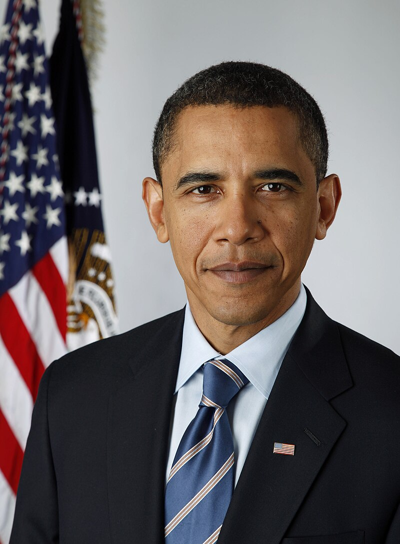

In [3]:
image = Image.open('./data/barak_obama.jpg')
display(scale_image(image, 0.5))

In [6]:
results = age_classifier(image)

df = pd.DataFrame(
    [(result['label'], float(result['score'])) for result in results],
    columns=['label', 'score']
)

df = df.sort_values('score', ascending=False).reset_index(drop=True)

display(df)


,label,score
0,40-50,0.931167
1,30-40,0.052547
2,50-60,0.003470
3,20-30,0.002690
4,0-10,0.002308
